In [4]:
import pandas as pd
df = pd.read_excel('US Superstore data.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
rows_with_nan = df[df.isnull().any(axis=1)]
rows_with_nan

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [6]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Row ID, Order ID, Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, Country, City, State, Postal Code, Region, Product ID, Category, Sub-Category, Product Name, Sales, Quantity, Discount, Profit]
Index: []

[0 rows x 21 columns]


2. Data Visualization With Plotly:

Create an interactive line chart to show sales trends over the years.
Build an interactive map to visualize sales distribution by country.

In [7]:
import plotly.express as px
df['Year'] = df['Order Date'].dt.year
sales_trend = df.groupby('Year')['Sales'].sum().reset_index()

fig = px.line(sales_trend, x='Year', y='Sales', title='Sales Trends Over the Years')
fig.show()

In [8]:
sales_by_country = df.groupby('Country')['Sales'].sum().reset_index()
fig = px.choropleth(sales_by_country, locations='Country', locationmode='country names', color='Sales', title='Sales Distribution by Country')
fig.show()

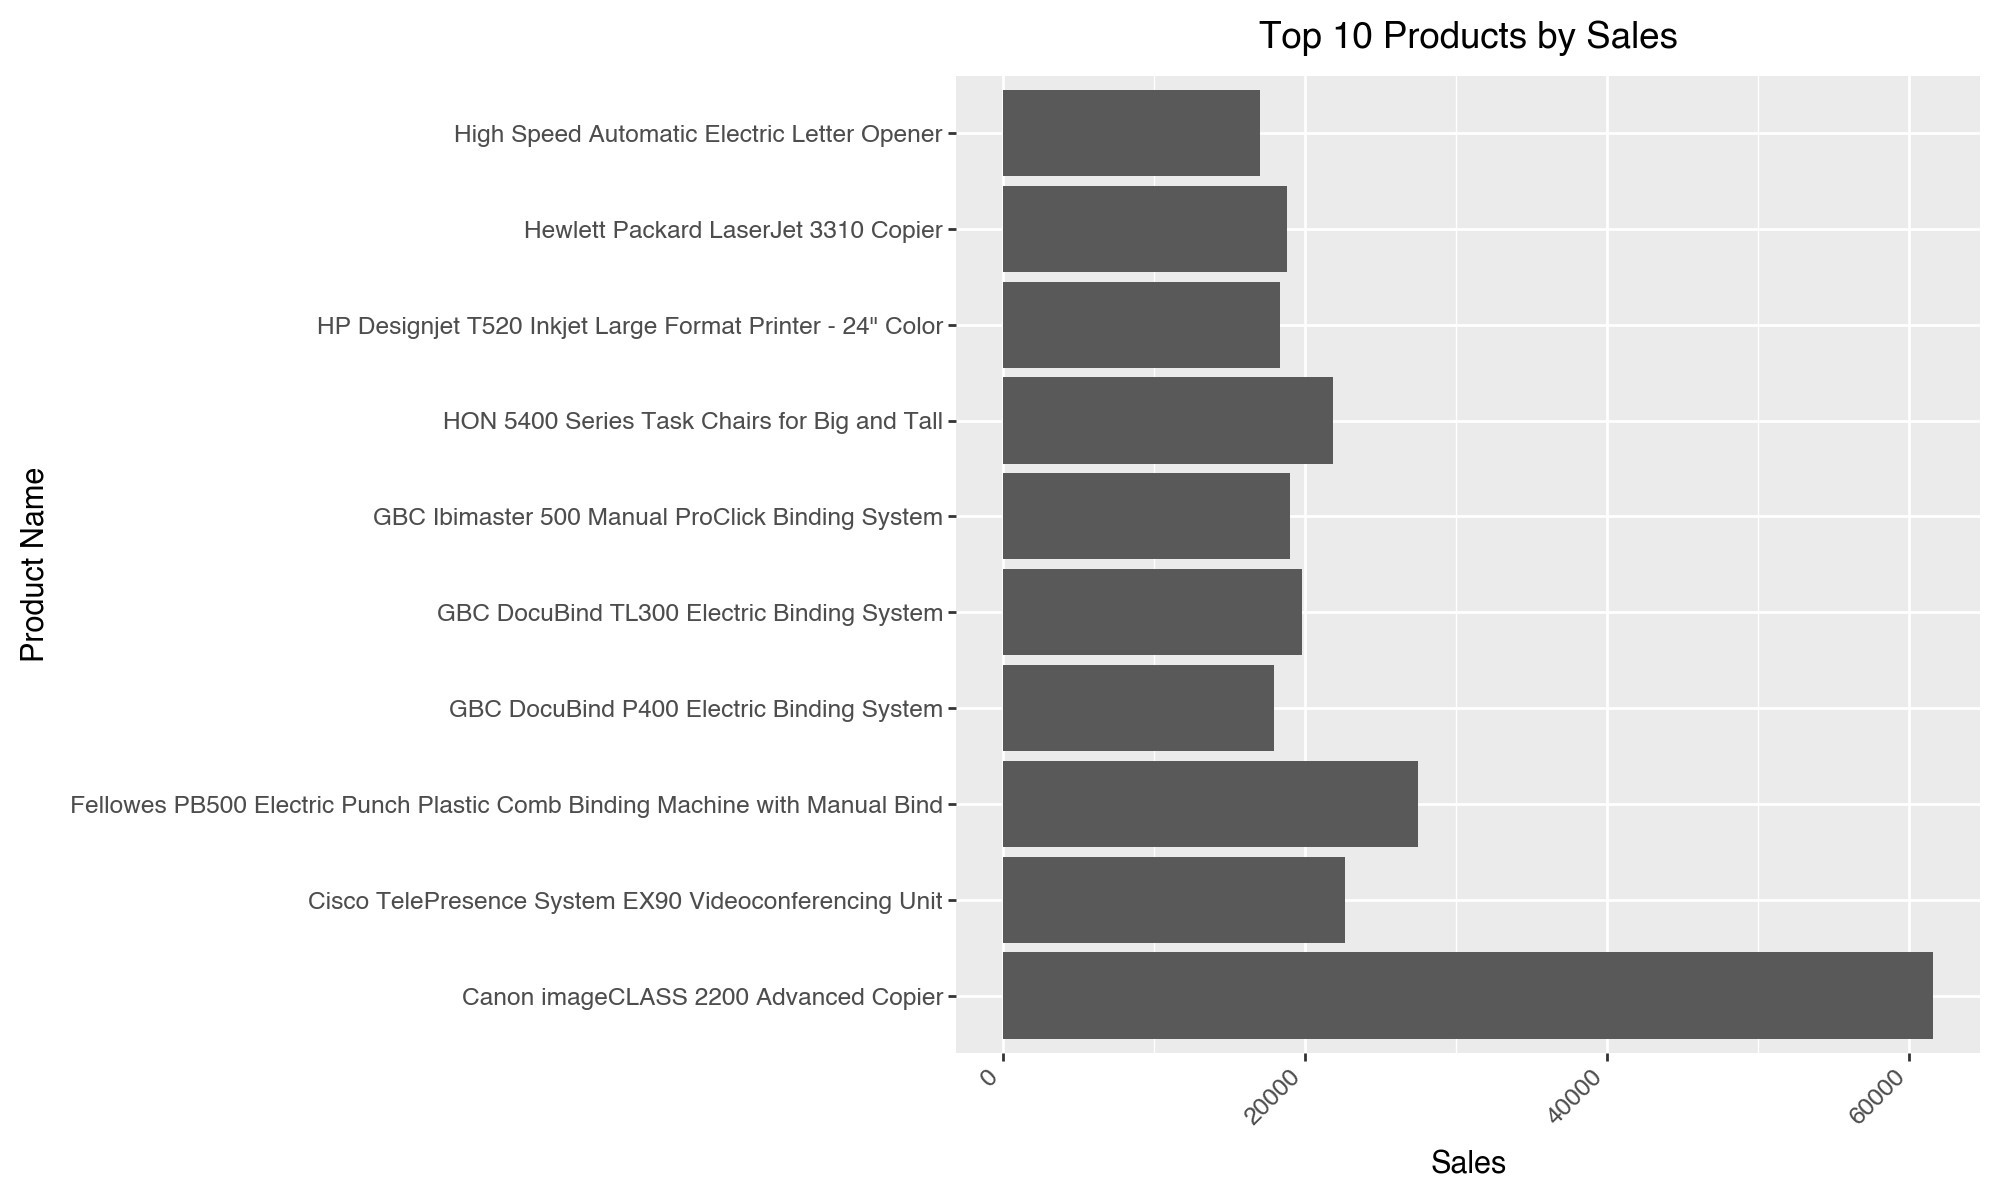

In [13]:
# 3. Data Visualization With Plotnine:

# Use Plotnine to generate a bar chart showing top 10 products by sales.
# Create a scatter plot to analyze the relationship between profit and discount.
from plotnine import *
top_products = df.groupby('Product Name')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False).head(10)

bar_chart = (ggplot(top_products, aes(x='Product Name', y='Sales')) +
             geom_bar(stat='identity') +
             coord_flip() +  # Flip the chart for better readability
             ggtitle('Top 10 Products by Sales') +
             theme(axis_text_x=element_text(rotation=45, hjust=1),figure_size=(10, 6)))
bar_chart


/var/folders/8h/hbj9kb412sz4vmszf826vrrc0000gn/T/ipykernel_80816/378011548.py:5: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


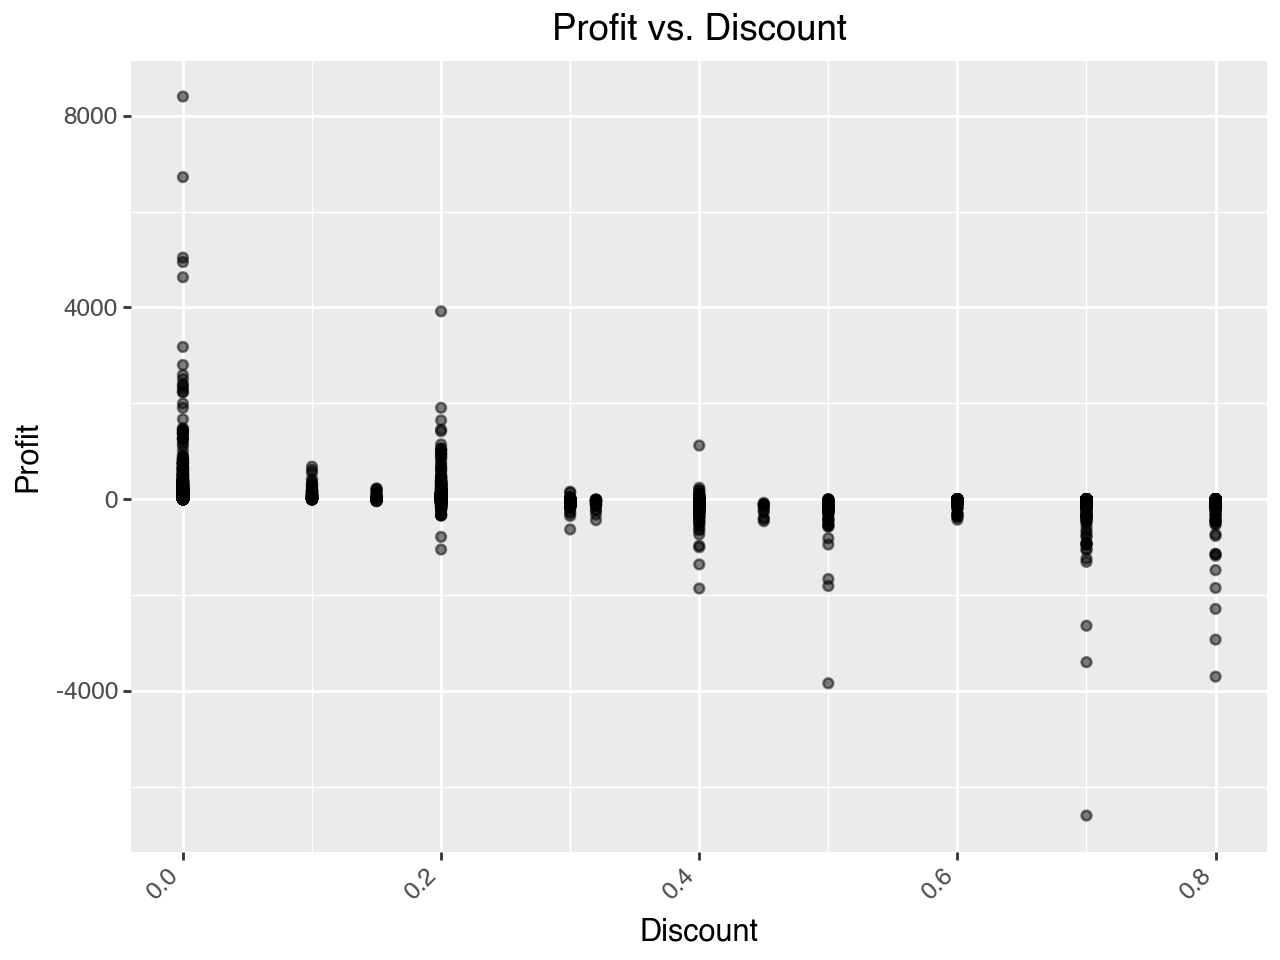

In [14]:
scatter_plot = (ggplot(df, aes(x='Discount', y='Profit')) +
                geom_point(alpha=0.5) +
                ggtitle('Profit vs. Discount') +
                theme(axis_text_x=element_text(rotation=45, hjust=1)))
print(scatter_plot)

In [ ]:
# 4. Comparative Analysis:
# Compare the insights gained from Plotly and Plotnine visualizations.
# Document your observations about the ease of use and effectiveness of both tools.


In [ ]:
# 5. Code And Insights:

# Write clear, well-documented Python code.
# Include your analysis and insights as comments or markdown cells in your Jupyter notebook.